<h1 align=center> Clustering des images du MNIST </h1>

<h2 align=center> OpenClassrooms : CentraleSupélec Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

Il s'agit d'un dataset très célèbre, appelé MNIST. Il est constitué d'un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L'objectif de ce jeu de données était de permettre à un ordinateur d'apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple). Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme.
Un extrait du type d'images que l'on trouve dans le dataset MNIST :

![title](MNIST.png)

Dans le cas où l'on aurait utilisé des images couleur et pas en niveaux de gris, on serait passé à 3 composantes couleurs par pixel (rouge, vert, bleu) et donc le nombre de features aurait été : 28 x 28 x 3 = 2352.

### OBJECTIF : 
#### Entraîner un algorithme de clustering qui sera capable de reconnaître les chiffres écrits sur ce type d'images  <br><br> et de segmenter ces images MNIST en 9 clusters correspondant aux chiffres de 0 à 9.

---

In [222]:
# Importations
import pandas as pd
%pylab inline

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, NMF, FactorAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

Populating the interactive namespace from numpy and matplotlib


### 1. Obtention du dataset via scikit-learn.datasets

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [14]:
# Check
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


mnist est un dictionnaire, avec les données dans 'data', les labels dans 'target'... sous forme d'array numpy.
On les récupère :

In [20]:
data = mnist.data
target = mnist.target

data.shape, target.shape

((70000, 784), (70000,))

### 2. Sampling ou Echantillonage

Vu la taille des données MNIST (70 000 images), on va échantilloner avec 1 image prelevées / 50 images. Sachant que chaque image à 784 features, on est déjà sur plus d'un million d'inputs.

In [115]:
# on génère 5000 echantillons aleatoires de valeurs (index de data) entre 0 et 70000 
#index_random = np.random.randint(data.shape[0], size=5000)
# ---
# X = data[index_random]
# y = target[index_random]

#     * *  OU  * *

# Comme indiqué, on prend 1 image sur 50 (garantit à priori stratification ?)

X = data[::50]
y = target[::50]


# check
X.shape, y.shape

((1400, 784), (1400,))

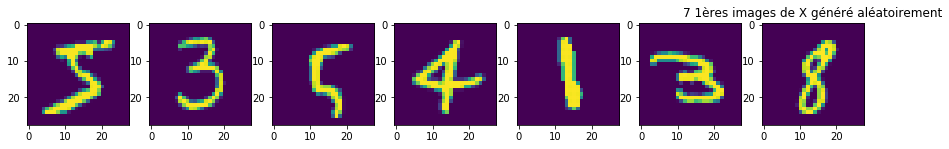

In [116]:
# Check image visuel --> les 3 premières images de X : IL FAUT RESHAPE 28x28 avant

fig = plt.figure(figsize=(15,10))

for image in range(7):
    ax = fig.add_subplot(1,7,image+1)
    ax.imshow(X.reshape((-1,28,28))[image])
    
plt.title('7 1ères images de X généré aléatoirement')
plt.show()

---

### 3. Clustering du MNIST - Etude demandé : 10 clusters

Nous allons créer différents clusters correspondant à différents algorithmes de clustering : Hierarchique, KMeans et DBSCAN en vu de les comparer plus tard.

#### Clustering agglomératif

#### Bien que le clustering hierarchique ne soit pas adapté à ce jeu de données énorme, du fait qu'ayant un coût quadratique en temps de calculs, on va  <br><br>l'implémenter dans le cadre de cette étude comparative.
On va d'abord juste essayer de représenter le dendogramme selon la methode de Ward, qui maximise la variance intra-cluster.

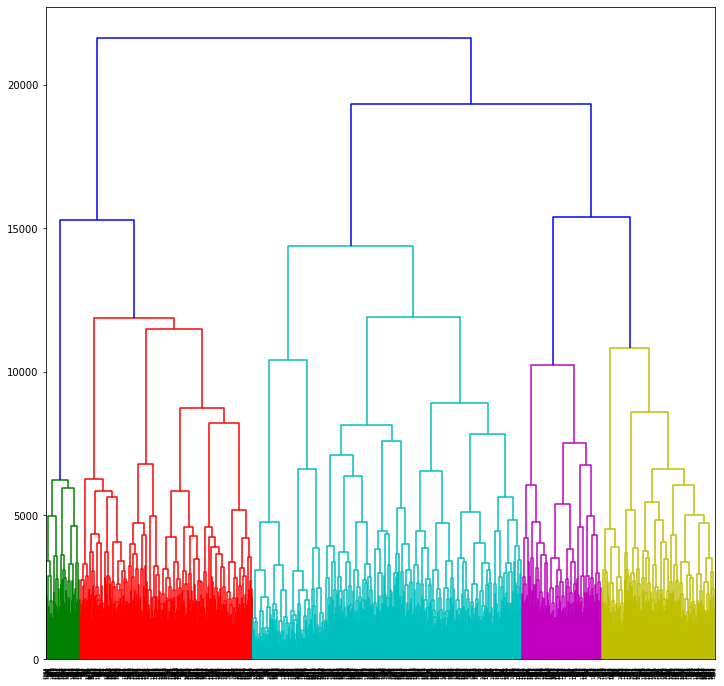

In [117]:
# Utilisation de Scipy pour visualiser le dendogramme
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 12))
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))

WAOOHH !! Les branches sont bien éloignées lorsqu'on coupe entre 9 et 11 noeuds. 

In [118]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print ("data standardized !")

data standardized !


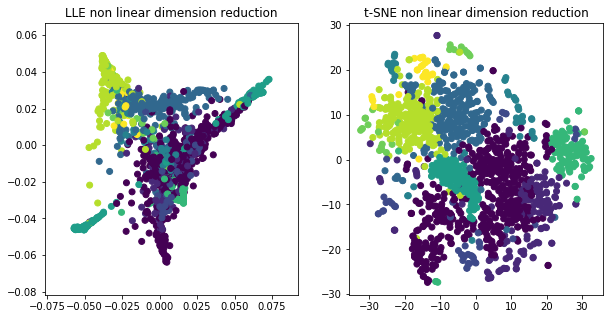

In [136]:
# creation du clustering agglomeratif avec 10 clusters
cls_agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')

cls_agglo.fit(X_scaled)

# Evaluation
aggloSCORE = adjusted_rand_score(y, cls_agglo.labels_)

# Embedding test via PCA, NMF, FactorAnalysis, Isomap, LLE, T-SNE ..

#pca = KernelPCA(n_components=2)
#pca.fit(X_scaled)

#nmf = NMF(n_components=2)
#nmf.fit(X)

#factor = FactorAnalysis(n_components=2)
#factor.fit(X_scaled)

#isomap = Isomap(n_components=2)
#isomap.fit(X_scaled)


lle = LocallyLinearEmbedding(n_components=2)
lle.fit(X_scaled)
X_trans_lle = lle.transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=100, n_iter=3000, init='pca')
X_trans_tsne = tsne.fit_transform(X_scaled)

# représentation
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans_lle[:,0], X_trans_lle[:,1], c=cls_agglo.labels_)
ax.set_title('LLE non linear dimension reduction')cls_agglo

ax = fig.add_subplot(122)
ax.scatter(X_trans_tsne[:,0], X_trans_tsne[:,1], c=cls_agglo.labels_)
ax.set_title('t-SNE non linear dimension reduction')

plt.show()


#### Clustering KMeans

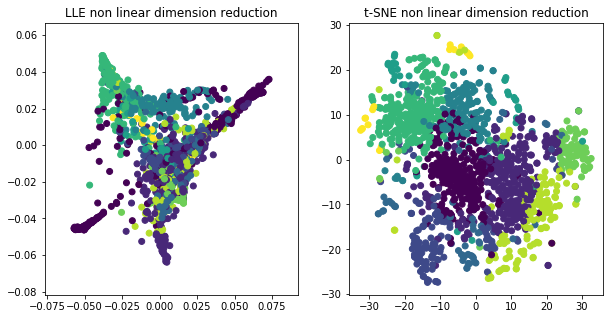

In [233]:
# creation du clustering KMeans avec 10 clusters
cls_kmeans = KMeans(n_clusters=10)

cls_kmeans.fit(X_scaled)

# Evaluation
kmeanSCORE = adjusted_rand_score(y, cls_kmeans.labels_)

# représentation
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans_lle[:,0], X_trans_lle[:,1], c=cls_kmeans.labels_)
ax.set_title('LLE non linear dimension reduction')

ax = fig.add_subplot(122)
ax.scatter(X_trans_tsne[:,0], X_trans_tsne[:,1], c=cls_kmeans.labels_)
ax.set_title('t-SNE non linear dimension reduction')

plt.show()

### Clustering DBSCAN

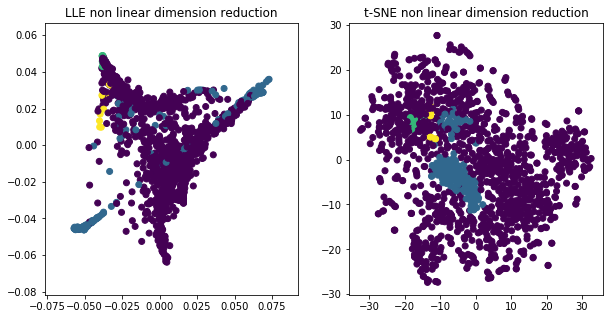

DBSCAN difficile à utiliser en 'tres' grande dimension (fléau de la dimensionnalité ici ?)


In [195]:
# creation du clustering DBSCAN avec 10 clusters
cls_dbscan = DBSCAN(eps=13, min_samples=9)

cls_dbscan.fit(X_scaled)

# Evaluation
dbscanSCORE = adjusted_rand_score(y, cls_dbscan.labels_)

# représentation
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.scatter(X_trans_lle[:,0], X_trans_lle[:,1], c=cls_dbscan.labels_)
ax.set_title('LLE non linear dimension reduction')

ax = fig.add_subplot(122)
ax.scatter(X_trans_tsne[:,0], X_trans_tsne[:,1], c=cls_dbscan.labels_)
ax.set_title('t-SNE non linear dimension reduction')

plt.show()
print("DBSCAN difficile à utiliser en 'tres' grande dimension (fléau de la dimensionnalité ici ?)")

---

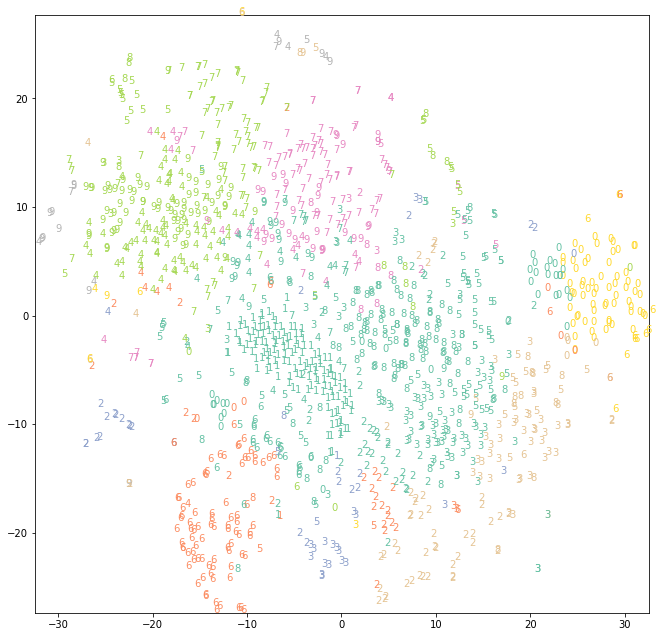

In [237]:
# Revoir : représentation avec Colormaps : https://matplotlib.org/tutorials/colors/colormaps.html 

plt.figure(figsize=(11,11))

for i in range(X_trans_tsne.shape[0]):
    
    plt.text(X_trans_tsne[i,0], X_trans_tsne[i,1], str('%s' % y[i]), color=plt.cm.Set2(cls_kmeans.labels_[i]/10.))
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans_tsne[:, 0]), np.max(X_trans_tsne[:, 0])])
plt.ylim([np.min(X_trans_tsne[:, 1]), np.max(X_trans_tsne[:, 1])])
plt.show()

In [238]:
print("Hierarchical adjusted_rand_score :", aggloSCORE)
print("KMeans adjusted_rand_score       :", kmeanSCORE)
print("DBSCAN adjusted_rand_score       :", dbscanSCORE)

Hierarchical adjusted_rand_score : 0.289320619628567
KMeans adjusted_rand_score       : 0.2631796051373572
DBSCAN adjusted_rand_score       : 0.04704181063892189


L'algorithme DBSCAN ne semble pas du tout adapté à ce dataset. 
KMeans et Hierarchical obtiennent peu d'étiquettes correctement trouvées correspondant aux vrais labels (< 30%). 

Suite : Optimisation de l'algorithme de Clustering du MNIST.

---